# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wilson Gregory
- **Email:** wilson118877@gmail.com / m002d4ky2640@bangkit.academy
- **ID Dicoding:** wilson187

## Menentukan Pertanyaan Bisnis

Setelah melihat sekilas dataset yang ada, saya menentukan pertanyaan-pertanyaan berikut:
1. Apa kategori produk yang paling banyak dibeli oleh pengguna?
2. Manakah negara bagian (konteks di Brazil) dengan customer dan seller terbanyak?

## Import Semua Packages/Library yang Digunakan

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Untuk menjawab pertanyaan-pertanyaan tersebut, kita akan muat tabel yang kita perlukan, yaitu data customer, order items, product category name translation, dan sellers.

Memuat tabel customers

In [4]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
product_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

1. Menilai Data customers_df (Data pribadi pelanggan)

Pada data ini, kita akan memerlukan customer_id dan customer_state.


In [15]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [47]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [35]:
customers_df['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

Dari info di atas, tidak ada keanehan pada data customers_id dan customer_state dan tidak ada data yang duplikat sesuai dengan sifat dari ID.

2. Menilai data order_items_df (Data pesanan yang masuk)

Di sini, saya sedikit bingung menginterpretasikan kolom order_item_id, dan saya asumsikan bahwa kolom tersebut merupakan id bukan banyak produk yang dipesan. Jadi kolom yang akan dipakai adalah product_id.

In [36]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [53]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


Dari info tersebut, tidak ada data yang aneh pada product_id dan seller_id.

3. Menilai data products_df (Data tiap produk yang tersedia)

Data yang akan kita pakai adalah product_id dan product_category_name

In [41]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [46]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada yang aneh pada info tersebut.

In [45]:
products_df['product_category_name'].head()

0               perfumaria
1                    artes
2            esporte_lazer
3                    bebes
4    utilidades_domesticas
Name: product_category_name, dtype: object

In [50]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Namun, karena produk tersebut masih berupa bahasa Spanyol, maka kita akan gunakan data product_category_name_translation.csv untuk menerjemahkan nama produk-produk tersebut ke bahasa Inggris.

4. Menilai data sellers_df (Data penjual)

Data yang akan kita pakai adalah data seller_id dan seller_state.

In [43]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [52]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


Dan tidak ada keanehan data jika kita lihat melalui info.

### Cleaning Data

Karena dataset yang akan dipakai tidak memiliki keanehan, maka proses cleaning data akan dilewati.

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1

1. Apa kategori produk yang paling banyak dibeli oleh pengguna?

Untuk menjawab pertanyaan tersebut, kita akan menggunakan:
1. product_id, dari order_items_df
2. product_id, product_category_name, dari products_df
3. product_category_name, product_category_name_english, dari product_translation_df

Kita akan merge order_items_df dan products_df berdasarkan product_id untuk mengambil nama produknya. Lalu, karena nama produk masih dalam spanyol, kita akan merge products_df dengan product_translation_df berdasarkan product_category_name untuk memperoleh nama Inggrisnya.

In [88]:
# df1.merge(df2, how='left', on='a')
grouped_df = order_items_df.merge(products_df, how='left', on='product_id').merge(product_translation_df, how='left', on='product_category_name')
grouped_df = grouped_df[['order_id', 'product_category_name_english']]
grouped_df

,order_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,computers_accessories


Kemudian, kita akan mencari value count dari masing-masing produk yang dipesan.

In [90]:
product_count_df = pd.DataFrame(grouped_df['product_category_name_english'].value_counts())

product_count_df = product_count_df.reset_index()
product_count_df.columns = ['products', 'counts']
product_count_df

,products,counts
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
66,arts_and_craftmanship,24
67,cds_dvds_musicals,14
68,la_cuisine,14
69,fashion_childrens_clothes,8


### Explore Pertanyaan 2

2. Manakah negara bagian (konteks di Brazil) dengan customer dan seller terbanyak?

Untuk menjawab pertanyaan tersebut, kita akan menggunakan:
1. customer_id, customer_state, dari customers_df
2. seller_id, seller_state, dari sellers_df

Hitung banyaknya setiap state pada data customer

In [104]:
customer_state_df = pd.DataFrame(customers_df['customer_state'].value_counts())

customer_state_df = customer_state_df.reset_index()
customer_state_df.columns = ['states', 'counts']
customer_state_df

,states,counts
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Hitung banyaknya setiap state pada data seller

In [107]:
seller_state_df = pd.DataFrame(sellers_df['seller_state'].value_counts())

seller_state_df = seller_state_df.reset_index()
seller_state_df.columns = ['states', 'counts']
seller_state_df

,states,counts
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Plot bar plot 10 kategori produk teratas.

C:\Users\HP\AppData\Local\Temp\ipykernel_24392\1981133726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


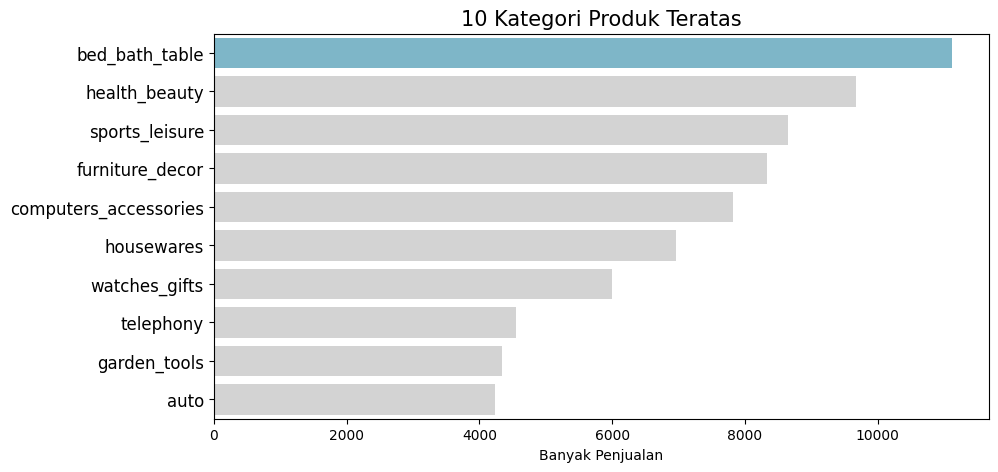

In [103]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="counts", 
    y="products",
    data=product_count_df.sort_values(by="counts", ascending=False)[:10],
    palette=colors_
)
plt.title("10 Kategori Produk Teratas", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('Banyak Penjualan')
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 2:

C:\Users\HP\AppData\Local\Temp\ipykernel_24392\385283313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


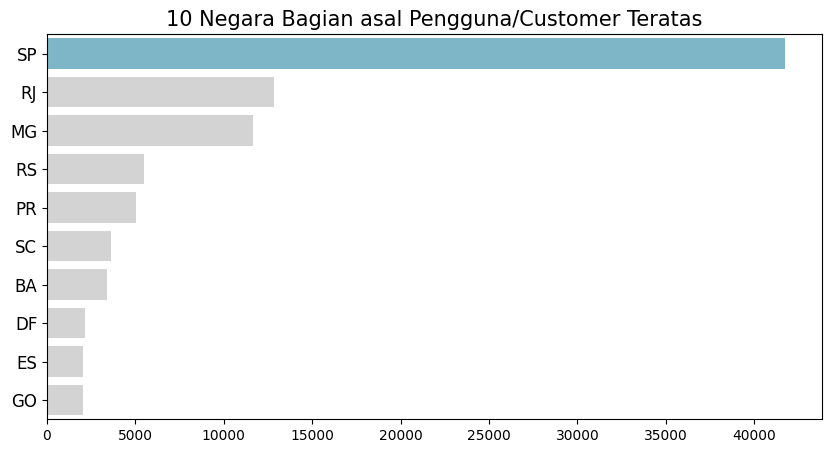

In [116]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="counts", 
    y="states",
    data=customer_state_df.sort_values(by="counts", ascending=False)[:10],
    palette=colors_
)
plt.title("10 Negara Bagian asal Pengguna/Customer Teratas", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_24392\2892887496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


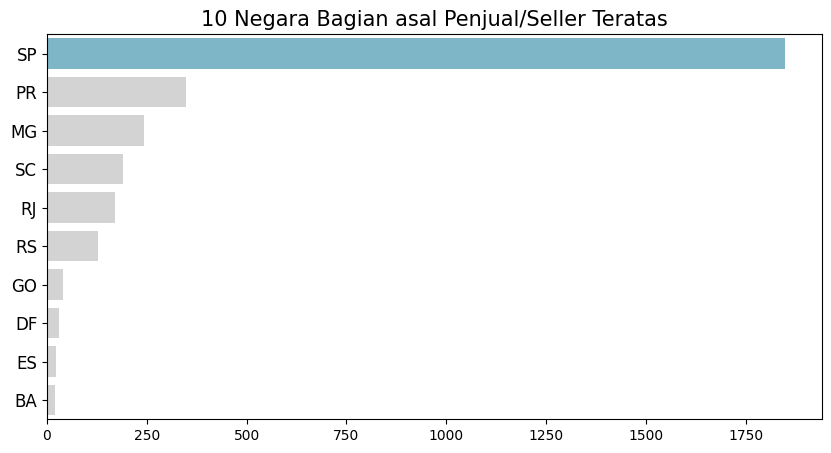

In [117]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="counts", 
    y="states",
    data=seller_state_df.sort_values(by="counts", ascending=False)[:10],
    palette=colors_
)
plt.title("10 Negara Bagian asal Penjual/Seller Teratas", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 

Apa kategori produk yang paling banyak dibeli oleh pengguna?

Kategori produk yang paling banyak dibeli oleh pengguna adalah kategori bed, bath, table dengan jumlah penjualan melewati 10ribu pesanan. Lalu diikuti dengan kategori health beauty yang hampir mencapai 10ribu pesanan.

- Conclution pertanyaan 2

Manakah negara bagian (konteks di Brazil) dengan customer dan seller terbanyak?

Dari kedua plot tersebut, dapat dilihat bahwa sebagian besar customer dan seller berasal dari SP, yaitu Sao Paulo.

In [115]:
product_count_df.to_csv("data/product_count_data.csv", index=False)
customer_state_df.to_csv("data/customer_state_data.csv", index=False)
seller_state_df.to_csv("data/seller_state_data.csv", index=False)